In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=033fff51e6043a0943217cdc8cbf26d54e7a957690b423e778743e3425547664
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
!pip install rouge

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import wordcloud
import contractions
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import spacy
import collections
from sklearn import preprocessing, model_selection, feature_extraction, feature_selection, metrics, manifold, naive_bayes, pipeline
from tensorflow.keras import callbacks, models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
from lime import lime_text
import shap
import gensim
import gensim.downloader as gensim_api
import transformers
import rouge
import difflib
import time

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Capstone_data/Training_data.csv')

In [ ]:
train_data.head(5)

,bid,is_aggregate,source,chapter_path,summary_path,book_id,summary_id,content,summary,chapter,chapter_length,summary_name,summary_url,summary_text,summary_analysis,summary_length,analysis_length,New_Summary
0,27681,True,cliffnotes,all_chapterized_books/27681-chapters/chapters_...,finished_summaries/cliffnotes/The Last of the ...,The Last of the Mohicans.chapters 1-2,chapters 1-2,NaN,"{""name"": ""Chapters 1-2"", ""url"": ""https://web.a...","\n ""Mine ear is open, and my heart prepared:\...",6471.0,Chapters 1-2,https://web.archive.org/web/20201101053205/htt...,"Before any characters appear, the time and geo...",These two chapters introduce the reader to the...,388.0,473.0,"Before any characters appear, the time and geo..."
1,27681,False,cliffnotes,all_chapterized_books/27681-chapters/03.txt,finished_summaries/cliffnotes/The Last of the ...,The Last of the Mohicans.chapter 3,chapter 3,NaN,"{""name"": ""Chapter 3"", ""url"": ""https://web.arch...","\n ""Before these fields were shorn and tilled...",3132.0,Chapter 3,https://web.archive.org/web/20201101053205/htt...,In another part of the forest by the river a f...,This chapter introduces the other three main a...,198.0,149.0,In another part of the forest by the river a f...
2,27681,False,cliffnotes,all_chapterized_books/27681-chapters/04.txt,finished_summaries/cliffnotes/The Last of the ...,The Last of the Mohicans.chapter 4,chapter 4,NaN,"{""name"": ""Chapter 4"", ""url"": ""https://web.arch...","\n ""Well, go thy way: thou shalt not from thi...",3075.0,Chapter 4,https://web.archive.org/web/20201101053205/htt...,When the mounted party from Fort Howard approa...,Since this chapter is mostly one of surface ac...,319.0,75.0,When the mounted party from Fort Howard approa...
3,27681,False,cliffnotes,all_chapterized_books/27681-chapters/05.txt,finished_summaries/cliffnotes/The Last of the ...,The Last of the Mohicans.chapter 5,chapter 5,NaN,"{""name"": ""Chapter 5"", ""url"": ""https://web.arch...","\n ""In such a night\n Di...",3268.0,Chapter 5,https://web.archive.org/web/20201101053205/htt...,"The pursuit of Magua is unsuccessful, but Hawk...",Here the reader encounters the first bloodshed...,329.0,156.0,"The pursuit of Magua is unsuccessful, but Hawk..."
4,27681,False,cliffnotes,all_chapterized_books/27681-chapters/06.txt,finished_summaries/cliffnotes/The Last of the ...,The Last of the Mohicans.chapter 6,chapter 6,NaN,"{""name"": ""Chapter 6"", ""url"": ""https://web.arch...","\n ""Those strains that once did sweet in Zion...",3873.0,Chapter 6,https://web.archive.org/web/20201101053205/htt...,Heyward and the girls are uneasy and Gamut is ...,This chapter shows Cooper in his most inventiv...,321.0,128.0,Heyward and the girls are uneasy and Gamut is ...


In [ ]:
train_data['New_Summary'][0]

'Before any characters appear, the time and geography are made clear. Though it is the last war that England and France waged for a country that neither would retain, the wilderness between the forces still has to be overcome first. Thus it is in 1757, in the New York area between the head waters of the Hudson River and Lake George to the north. Because only two years earlier General Braddock was disgracefully routed by a handful of French and Indians, the frontier is now exposed to real and imaginary savage disasters as well as to the horrors of warfare. Fear has replaced reason. Near dusk of a day in July, an Indian runner named Magua arrives at Fort Edward on the upper Hudson. He has come from Fort William Henry at the southern tip of Lake George with the news that the French General Montcalm is moving south with a very large army and that Munro, commander of Fort William Henry, is in urgent need of plentiful reinforcements from General Webb. Early the next morning, a limited detach

In [ ]:
#FUNCTION TO CREATE STOP WORDS
def create_stopwords(lst_langs=["english"], lst_add_words=[], lst_keep_words=[]):
    lst_stopwords = set()
    for lang in lst_langs:
        lst_stopwords = lst_stopwords.union( set(nltk.corpus.stopwords.words(lang)) )
    lst_stopwords = lst_stopwords.union(lst_add_words)
    lst_stopwords = list(set(lst_stopwords) - set(lst_keep_words))
    return sorted(list(set(lst_stopwords)))

In [ ]:
lst_stopwords = create_stopwords()
print(len(lst_stopwords))

179


In [ ]:
#FUNCTION TO CLEAN THE TEXT

def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

def utils_preprocess_text(txt, lst_regex=None, punkt=True, lower=True, slang=True, lst_stopwords=None):
    ## Regex (in case, before cleaning)
    if lst_regex is not None:
        for regex in lst_regex:
            txt = re.sub(regex, '', txt)

    ## Clean
    ### separate sentences with '. '
    txt = re.sub(r'\.(?=[^ \W\d])', '. ', str(txt))
    ### remove punctuations and characters
    txt = re.sub(r'[^\w\s]', '', txt) if punkt is True else txt
    ### strip
    txt = " ".join([word.strip() for word in txt.split()])
    ### lowercase
    txt = txt.lower() if lower is True else txt
    ### slang
    txt = contractions.fix(txt) if slang is True else txt

    ## Tokenize (convert from string to list)
    lst_txt = txt.split()

    # ## Stemming (remove -ing, -ly, ...)
    # if stemm is True:
    #     ps = nltk.stem.porter.PorterStemmer()
    #     lst_txt = [ps.stem(word) for word in lst_txt]

    # ## Lemmatization (convert the word into root word)
    # if lemm is True:
    #     lem = nltk.stem.wordnet.WordNetLemmatizer()
    #     lst_txt = [lem.lemmatize(word) for word in lst_txt]

    ## Stopwords
    if lst_stopwords is not None:
        lst_txt = [word for word in lst_txt if word not in lst_stopwords]

    lst_txt = [ word for word in lst_txt if isEnglish(word) is True]

    # # remove words less than three letters
    # lst_txt = [word for word in lst_txt if len(word) >= 3]

    ## Back to string
    txt = " ".join(lst_txt)
    return txt


#FUNCTION TO ADD A COLUMN CONTAINING THE CLEANED TEXT
def add_preprocessed_text(data, column, lst_regex=None, punkt=False, lower=False, slang=False, lst_stopwords=None, remove_na=True):
    dtf = data.copy()

    ## apply preprocess
    dtf = dtf[ pd.notnull(dtf[column]) ]
    dtf[column+"_clean"] = dtf[column].apply(lambda x: utils_preprocess_text(x, lst_regex, punkt, lower, slang, lst_stopwords))

    ## residuals
    dtf["check"] = dtf[column+"_clean"].apply(lambda x: len(x))
    if dtf["check"].min() == 0:
        print("--- found NAs ---")
        print(dtf[[column,column+"_clean"]][dtf["check"]==0].head())
        if remove_na is True:
            dtf = dtf[dtf["check"]>0]

    return dtf.drop("check", axis=1)

In [ ]:
print("Starting to clean the Articles")
start = time.time()
df_cleaned = add_preprocessed_text(train_data, column="New_Summary",
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords)
end = time.time()
print("Time take to clean the Articles : {}".format(end-start))

Starting to clean the Articles
Time take to clean the Articles : 12.77261734008789


In [ ]:
df_cleaned.head(5)

,bid,is_aggregate,source,chapter_path,summary_path,book_id,summary_id,content,summary,chapter,chapter_length,summary_name,summary_url,summary_text,summary_analysis,summary_length,analysis_length,New_Summary,New_Summary_clean
0,27681,True,cliffnotes,all_chapterized_books/27681-chapters/chapters_...,finished_summaries/cliffnotes/The Last of the ...,The Last of the Mohicans.chapters 1-2,chapters 1-2,NaN,"{""name"": ""Chapters 1-2"", ""url"": ""https://web.a...","\n ""Mine ear is open, and my heart prepared:\...",6471.0,Chapters 1-2,https://web.archive.org/web/20201101053205/htt...,"Before any characters appear, the time and geo...",These two chapters introduce the reader to the...,388.0,473.0,"Before any characters appear, the time and geo...",characters appear time geography made clear th...
1,27681,False,cliffnotes,all_chapterized_books/27681-chapters/03.txt,finished_summaries/cliffnotes/The Last of the ...,The Last of the Mohicans.chapter 3,chapter 3,NaN,"{""name"": ""Chapter 3"", ""url"": ""https://web.arch...","\n ""Before these fields were shorn and tilled...",3132.0,Chapter 3,https://web.archive.org/web/20201101053205/htt...,In another part of the forest by the river a f...,This chapter introduces the other three main a...,198.0,149.0,In another part of the forest by the river a f...,another part forest river miles west hawkeye c...
2,27681,False,cliffnotes,all_chapterized_books/27681-chapters/04.txt,finished_summaries/cliffnotes/The Last of the ...,The Last of the Mohicans.chapter 4,chapter 4,NaN,"{""name"": ""Chapter 4"", ""url"": ""https://web.arch...","\n ""Well, go thy way: thou shalt not from thi...",3075.0,Chapter 4,https://web.archive.org/web/20201101053205/htt...,When the mounted party from Fort Howard approa...,Since this chapter is mostly one of surface ac...,319.0,75.0,When the mounted party from Fort Howard approa...,mounted party fort howard approaches three men...
3,27681,False,cliffnotes,all_chapterized_books/27681-chapters/05.txt,finished_summaries/cliffnotes/The Last of the ...,The Last of the Mohicans.chapter 5,chapter 5,NaN,"{""name"": ""Chapter 5"", ""url"": ""https://web.arch...","\n ""In such a night\n Di...",3268.0,Chapter 5,https://web.archive.org/web/20201101053205/htt...,"The pursuit of Magua is unsuccessful, but Hawk...",Here the reader encounters the first bloodshed...,329.0,156.0,"The pursuit of Magua is unsuccessful, but Hawk...",pursuit magua unsuccessful hawkeye feels wound...
4,27681,False,cliffnotes,all_chapterized_books/27681-chapters/06.txt,finished_summaries/cliffnotes/The Last of the ...,The Last of the Mohicans.chapter 6,chapter 6,NaN,"{""name"": ""Chapter 6"", ""url"": ""https://web.arch...","\n ""Those strains that once did sweet in Zion...",3873.0,Chapter 6,https://web.archive.org/web/20201101053205/htt...,Heyward and the girls are uneasy and Gamut is ...,This chapter shows Cooper in his most inventiv...,321.0,128.0,Heyward and the girls are uneasy and Gamut is ...,heyward girls uneasy gamut still struggling sp...


In [ ]:
train_data['New_Summary'][0]

'Before any characters appear, the time and geography are made clear. Though it is the last war that England and France waged for a country that neither would retain, the wilderness between the forces still has to be overcome first. Thus it is in 1757, in the New York area between the head waters of the Hudson River and Lake George to the north. Because only two years earlier General Braddock was disgracefully routed by a handful of French and Indians, the frontier is now exposed to real and imaginary savage disasters as well as to the horrors of warfare. Fear has replaced reason. Near dusk of a day in July, an Indian runner named Magua arrives at Fort Edward on the upper Hudson. He has come from Fort William Henry at the southern tip of Lake George with the news that the French General Montcalm is moving south with a very large army and that Munro, commander of Fort William Henry, is in urgent need of plentiful reinforcements from General Webb. Early the next morning, a limited detach

In [ ]:
df_cleaned['New_Summary_clean'][0]

'characters appear time geography made clear though last war england france waged country neither would retain wilderness forces still overcome first thus 1757 new york area head waters hudson river lake george north two years earlier general braddock disgracefully routed handful french indians frontier exposed real imaginary savage disasters well horrors warfare fear replaced reason near dusk day july indian runner named magua arrives fort edward upper hudson come fort william henry southern tip lake george news french general montcalm moving south large army munro commander fort william henry urgent need plentiful reinforcements general webb early next morning limited detachment fifteen hundred regulars colonists departs swallowed forest shortly afterwards major duncan heyward alice cora munro guided magua foot take horseback secret route toward william henry girls join father blonde alice doubtful magua covered war paint showing sullen fierceness darkhaired cora stoically common sen

In [ ]:
def word_freq(corpus, ngrams=[1,2,3], top=10, figsize=(10,7)):
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    ngrams = [ngrams] if type(ngrams) is int else ngrams

    ## calculate
    data_freq = pd.DataFrame()
    for n in ngrams:
        dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
        data_n = pd.DataFrame(dic_words_freq.most_common(), columns=["word","freq"])
        data_n["ngrams"] = n
        data_freq = data_freq.append(data_n)
    data_freq["word"] = data_freq["word"].apply(lambda x: " ".join(string for string in x) )
    data_freq = data_freq.sort_values(["ngrams","freq"], ascending=[True,False])

    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,
                data=data_freq.groupby('ngrams')["ngrams","freq","word"].head(top))
    ax.set(xlabel=None, ylabel=None, title="Most frequent words")
    ax.grid(axis="x")
    plt.show()
    return data_freq

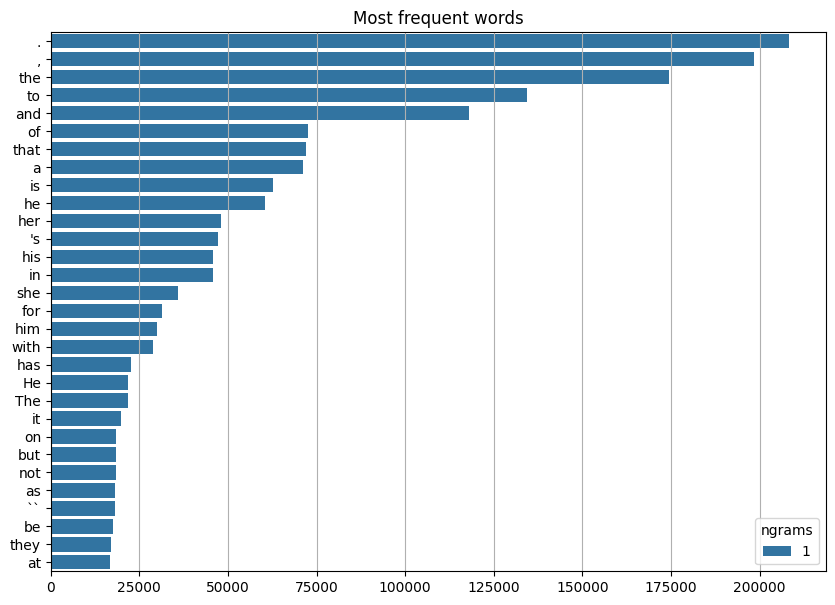

In [ ]:
# Find most common words in article
data_freq = word_freq(corpus = train_data["New_Summary"], ngrams = [1], top = 30, figsize = (10,7))

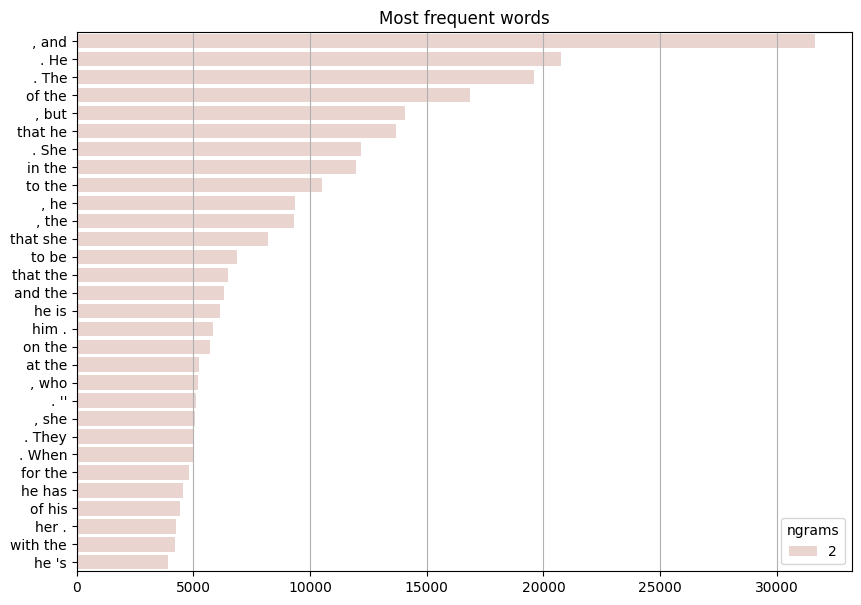

In [ ]:
# Find most common words in article
data_freq = word_freq(corpus = train_data["New_Summary"], ngrams = [2], top = 30, figsize = (10,7))

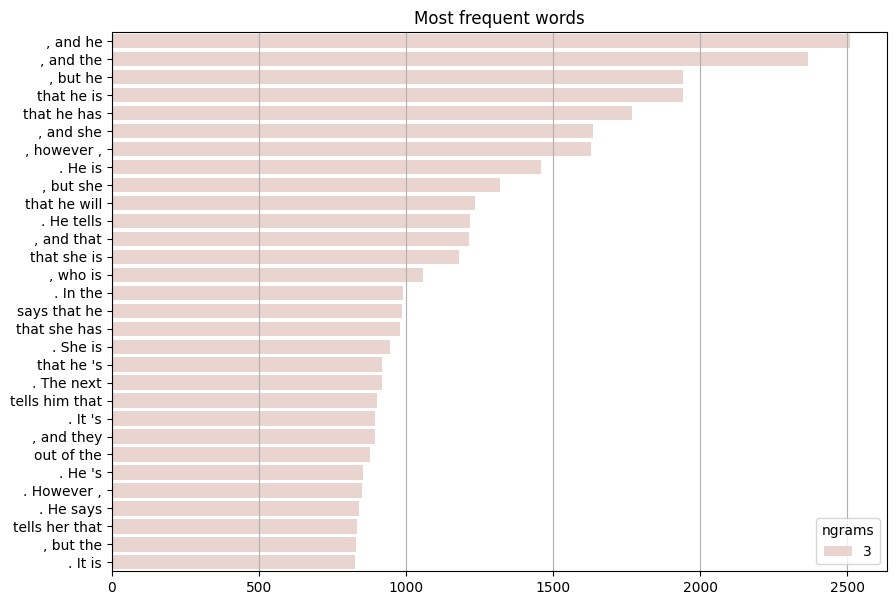

In [ ]:
# Find most common words in article
data_freq = word_freq(corpus = train_data["New_Summary"], ngrams = [3], top = 30, figsize = (10,7))

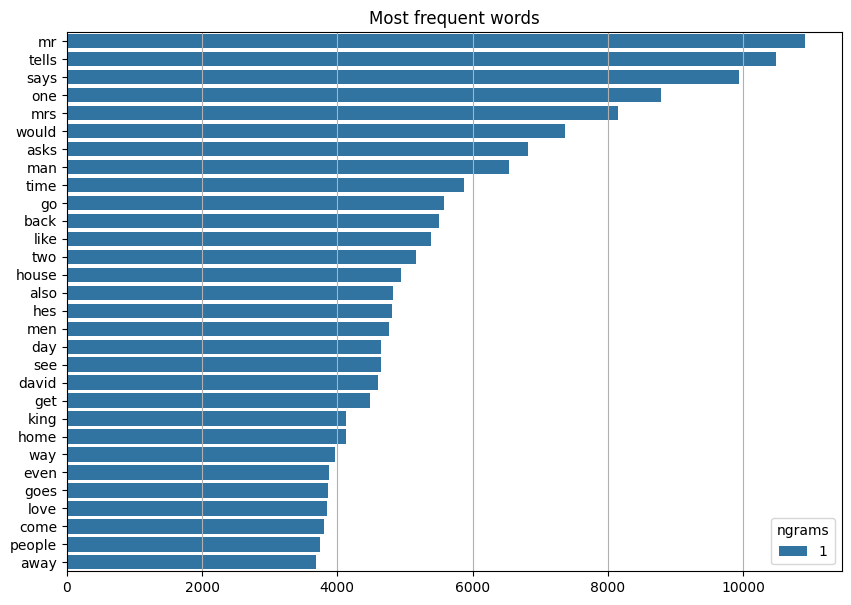

In [ ]:
# Find most common words in article
data_freq_clean = word_freq(corpus = df_cleaned["New_Summary_clean"], ngrams = [1], top = 30, figsize = (10,7))

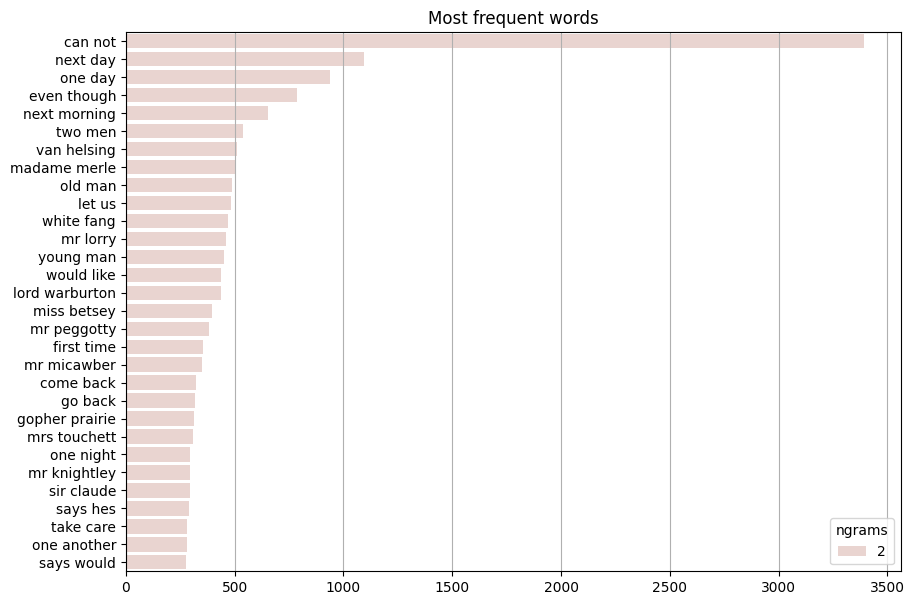

In [ ]:
# Find most common words in article
data_freq_clean = word_freq(corpus = df_cleaned["New_Summary_clean"], ngrams = [2], top = 30, figsize = (10,7))

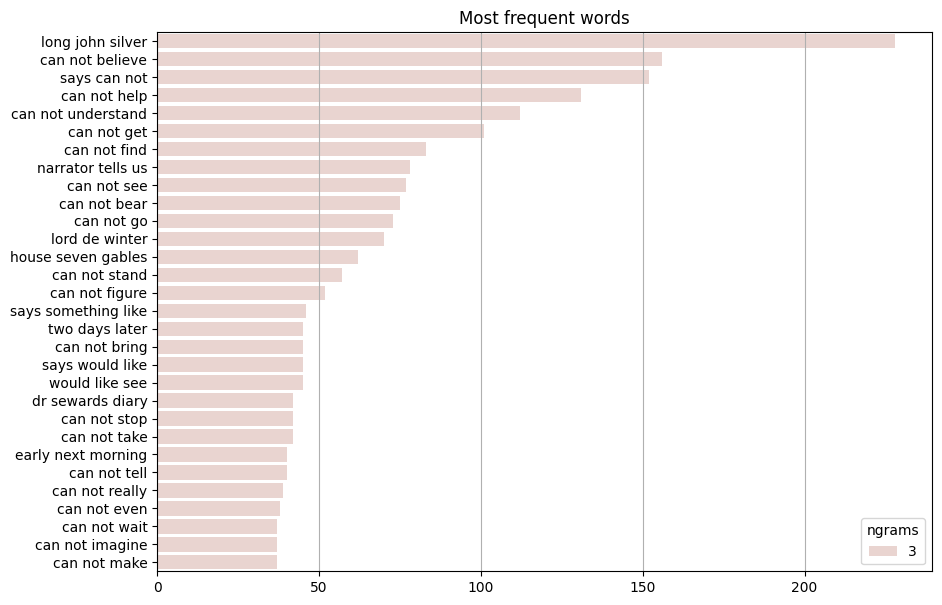

In [ ]:
# Find most common words in article
data_freq_clean = word_freq(corpus = df_cleaned["New_Summary_clean"], ngrams = [3], top = 30, figsize = (10,7))

In [ ]:
def add_text_length(data, column):
    data = data.copy()
    data['word_count'] = data[column].apply(lambda x: len(nltk.word_tokenize(str(x))) )
    data['char_count'] = data[column].apply(lambda x: sum(len(word) for word in nltk.word_tokenize(str(x))) )
    data['sentence_count'] = data[column].apply(lambda x: len(nltk.sent_tokenize(str(x))) )
    data['avg_word_length'] = data['char_count'] / data['word_count']
    data['avg_sentence_lenght'] = data['word_count'] / data['sentence_count']
    print(data[['char_count','word_count','sentence_count','avg_word_length','avg_sentence_lenght']].describe().T[["min","mean","max"]])
    return data

In [ ]:
# Texts
X = add_text_length(train_data, "New_Summary")

                         min         mean      max
char_count           9.00000  1757.701562  21931.0
word_count           2.00000   431.726667   5467.0
sentence_count       1.00000    22.438958    289.0
avg_word_length      3.24058     4.094395      6.6
avg_sentence_lenght  2.00000    19.877369     88.5


In [ ]:
# Texts
X_new = add_text_length(df_cleaned, "New_Summary_clean")

                     min         mean           max
char_count           9.0  1168.102708  14478.000000
word_count           2.0   195.728542   2524.000000
sentence_count       1.0     1.000000      1.000000
avg_word_length      4.5     5.984585      8.055556
avg_sentence_lenght  2.0   195.728542   2524.000000


In [ ]:
def plot_distributions(data, x, max_cat=20, top=None, y=None, bins=None, figsize=(10,5)):
    ## univariate
    if y is None:
        fig, ax = plt.subplots(figsize=figsize)
        fig.suptitle(x, fontsize=15)
        ### categorical
        if data[x].nunique() <= max_cat:
            if top is None:
                data[x].reset_index().groupby(x).count().sort_values(by="index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
            else:
                data[x].reset_index().groupby(x).count().sort_values(by="index").tail(top).plot(kind="barh", legend=False, ax=ax).grid(axis='x')
            ax.set(ylabel=None)
        ### numerical
        else:
            sns.distplot(data[x], hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
            ax.grid(True)
            ax.set(xlabel=None, yticklabels=[], yticks=[])

    ## bivariate
    else:
        fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=figsize)
        fig.suptitle(x, fontsize=15)
        for i in data[y].unique():
            sns.distplot(data[data[y]==i][x], hist=True, kde=False, bins=bins, hist_kws={"alpha":0.8}, axlabel="", ax=ax[0])
            sns.distplot(data[data[y]==i][x], hist=False, kde=True, kde_kws={"shade":True}, axlabel="", ax=ax[1])
        ax[0].set(title="histogram")
        ax[0].grid(True)
        ax[0].legend(data[y].unique())
        ax[1].set(title="density")
        ax[1].grid(True)
    plt.show()

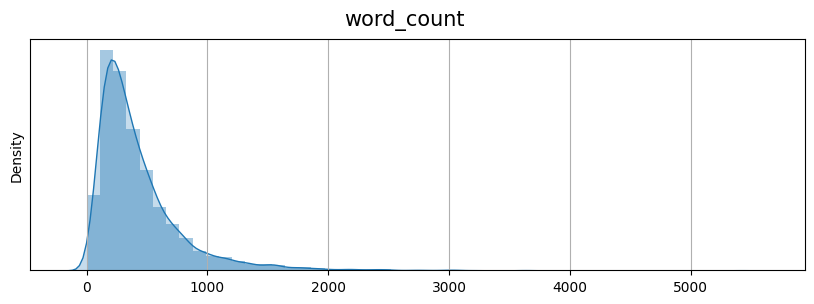

In [ ]:
plot_distributions(X, x = "word_count", figsize = (10,3))

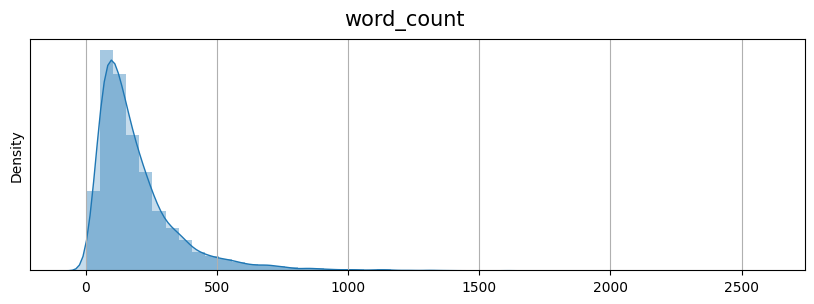

In [ ]:
plot_distributions(X_new, x = "word_count", figsize = (10,3))